# A predictive approach to estimate the maximum voluntary activation of the shoulder muscles

Romain Martinez<sup>*a</sup>, Jonathan Tremblay<sup>a</sup>, Mickael Begon<sup>a</sup>, Fabien Dal Maso<sup>a</sup>

<sup>a</sup>School of Kinesiology and Exercise Science, Faculty of Medicine, University of Montreal

[GitHub repo](https://github.com/romainmartinez/mvc)

# Appendix: demographic data

In [1]:
from pathlib import Path

import pandas as pd
import altair as alt

In [2]:
data_path = Path("./data/demo.csv")

demo_p3 = pd.read_csv(data_path)
demo_p3.head()

,participant,study,sex,mass,height,age
0,sarc,hvsf,w,55.5,170.0,21.0
1,inea,hvsf,w,55.8,167.0,20.0
2,dapo,hvsf,w,61.4,176.0,22.0
3,laug,hvsf,w,66.0,180.0,21.0
4,mara,hvsf,w,56.7,163.0,21.0


In [3]:
shwartz = {
    'n': 13,
    'n_male': 13,
    'n_female': 0,
    'age_mean': 25.3,
    'age_std': 3.7,
    'mass_mean': 76.2,
    'mass_std': 11.5,
    'height_mean': 180,
    'height_std': 5
}

mcdonald = {
    'n': 10,
    'n_male': 10,
    'n_female': 0,
    'age_mean': 23.6,
    'age_std': 3.4,
    'mass_mean': 79.4,
    'mass_std': 12.6,
    'height_mean': 179,
    'height_std': 4.8
}

boettcher = {
    'n': 15,
    'n_male': 9,
    'n_female': 6,
    'age_mean': 28.4,
    'age_std': None,
    'mass_mean': None,
    'mass_std': None,
    'height_mean': None,
    'height_std': None
}

dalmaso = {
#     'n': 15,
#     'n_male': 9,
#     'n_female': 6,
#     'age_mean': 28.4,
#     'age_std': None,
#     'mass_mean': None,
#     'mass_std': None,
#     'height_mean': None,
#     'height_std': None
}

us = {
    'n': demo_p3.shape[0],
    'n_male': demo_p3.query('sex == "m"').shape[0],
    'n_female': demo_p3.query('sex == "w"').shape[0],
    'age_mean': demo_p3['age'].mean(),
    'age_std': demo_p3['age'].std(),
    'mass_mean': demo_p3['mass'].mean(),
    'mass_std': demo_p3['mass'].std(),
    'height_mean': demo_p3['height'].mean(),
    'height_std': demo_p3['height'].std()
}

In [21]:
d = pd.DataFrame({'P-3': us, 'DM-14': dalmaso, 'Mcdonald': mcdonald, 'Shwartz':shwartz, 'Boettcher': boettcher}).T.reset_index()
d

,index,age_mean,age_std,height_mean,height_std,mass_mean,mass_std,n,n_female,n_male
0,P-3,25.669725,6.728952,174.307087,9.406543,71.280394,12.548017,127.0,45.0,82.0
1,DM-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mcdonald,23.600000,3.400000,179.000000,4.800000,79.400000,12.600000,10.0,0.0,10.0
3,Shwartz,25.300000,3.700000,180.000000,5.000000,76.200000,11.500000,13.0,0.0,13.0
4,Boettcher,28.400000,NaN,NaN,NaN,NaN,NaN,15.0,6.0,9.0


In [35]:
p = alt.Chart().mark_circle(size=100).encode(alt.Y('index', title=None))
s = alt.Chart().mark_rule(size=2).encode(alt.X('x:Q', scale=alt.Scale(zero=False)), alt.X2('x2:Q'), alt.Y('index'))

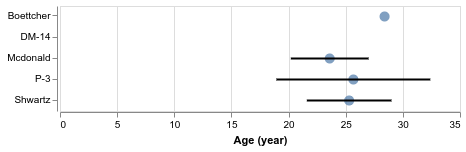

In [38]:
age_p = p.encode(alt.X('age_mean', title='Age (year)',scale=alt.Scale(zero=False)))
age_s = s.transform_calculate(
        x="datum.age_mean - datum.age_std", x2="datum.age_mean + datum.age_std"
    )

age = (age_p + age_s).facet(data=d)
age

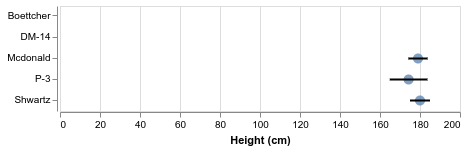

In [37]:
height_p = p.encode(alt.X('height_mean', title='Height (cm)'))
height_s = s.transform_calculate(
        x="datum.height_mean - datum.height_std", x2="datum.height_mean + datum.height_std"
    )

height = (height_p + height_s).facet(data=d)
height

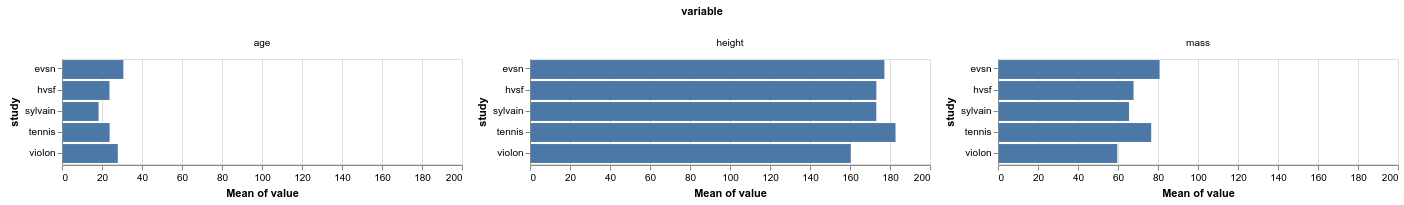

In [29]:
c = (alt.Chart().mark_bar().encode(
    alt.Y('study'), alt.X('mean(value):Q')
).facet(data=demo_melted, column=alt.Column('variable')).resolve_scale(y='independent'))

c